In [32]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import  seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


In [2]:
#loading the dataset
df=pd.read_csv('Customer_data.csv')

# Exploratory data analysis 

In [3]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.0


In [4]:
df.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,age
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,49.806993,11.349650,3033.420979,7.386014,507.942657,0.873785,51.053147
std,27.735227,5.011274,851.685794,2.830274,290.855597,0.296971,17.023463
min,0.000000,1.000000,2000.000000,1.000000,1.000000,0.340000,21.000000
25%,27.000000,7.000000,2212.500000,6.000000,252.000000,0.637500,38.000000
50%,51.000000,11.000000,3013.000000,8.000000,524.000000,0.836719,50.000000
75%,71.500000,15.000000,3855.000000,9.000000,760.000000,1.073125,65.000000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750,84.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           715 non-null    object 
 1   last_name                            715 non-null    object 
 2   gender                               715 non-null    object 
 3   past_3_years_bike_related_purchases  715 non-null    int64  
 4   DOB                                  715 non-null    object 
 5   job_title                            715 non-null    object 
 6   job_industry_category                715 non-null    object 
 7   wealth_segment                       715 non-null    object 
 8   deceased_indicator                   715 non-null    object 
 9   owns_car                             715 non-null    object 
 10  tenure                               715 non-null    int64  
 11  address                         

checking for null values

In [6]:
df.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
dtype: int64

checking for duplicate values 

In [7]:
duplicate_rows = df[df.duplicated()]
duplicate_rows


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age


Checking the datatypes

In [8]:
df.dtypes

first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
Rank                                     int64
Value                                  float64
age                                    float64
dtype: object

In [9]:
#converting the datatypes of age to int and DOB to datetime
# Converting 'DOB' column to datetime
df['DOB'] = pd.to_datetime(df['DOB'])

# Convert 'age' column to integer
df['age'] = df['age'].astype(int)


finding the proportion of males and females in the dataset 

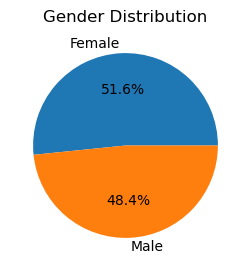

In [10]:
# Count the number of each gender
gender_counts = df['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(3,3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

creating different age groups

In [11]:
# Defining the age bins
age_bins = [0, 20, 30, 40, 50, 60, 100]

# Creating a new column 'age_bin' with the bin labels
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Counting the number of individuals in each age bin
age_bin_counts = df['age_group'].value_counts().sort_index()


identifying the buying pattern of different age groups

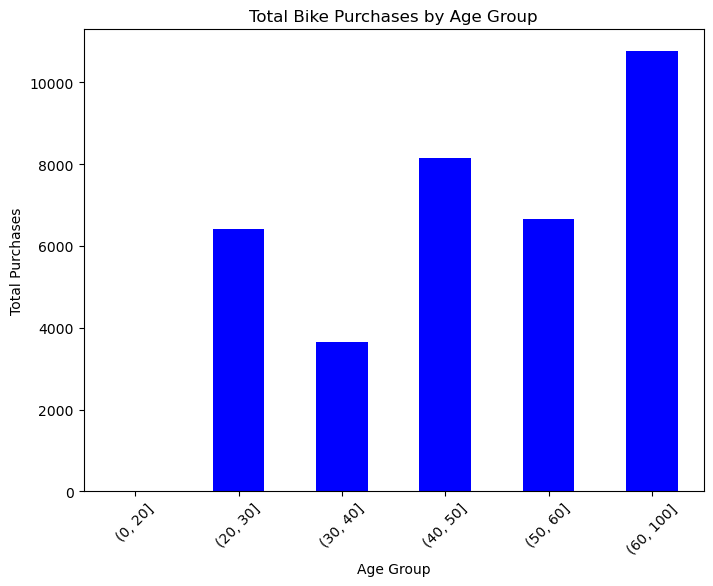

In [12]:
import matplotlib.pyplot as plt

# Group the data by age group and calculate the sum of purchases
age_group_purchases = df.groupby('age_group')['past_3_years_bike_related_purchases'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
age_group_purchases.plot(kind='bar', color='blue')
plt.title('Total Bike Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()


identifying the pattern of wealth_segment

<Figure size 1000x600 with 0 Axes>

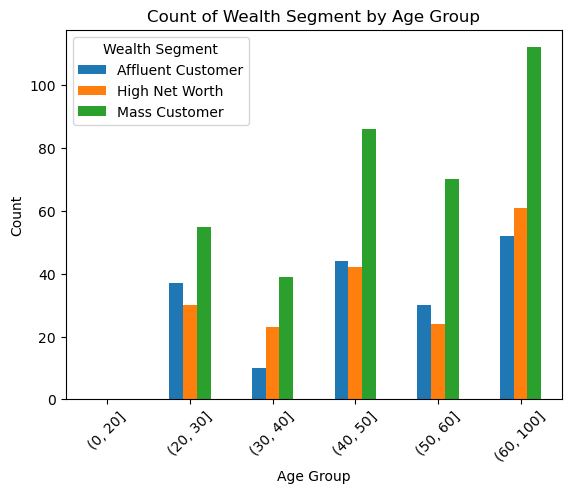

In [13]:

# Counting the number of occurrences for each combination of age group and wealth segment
age_wealth_counts = df.groupby(['age_group', 'wealth_segment']).size().unstack()

# Ploting the bar chart
plt.figure(figsize=(10, 6))
age_wealth_counts.plot(kind='bar')
plt.title('Count of Wealth Segment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Wealth Segment')
plt.show()


identifying the pattern with job industry category

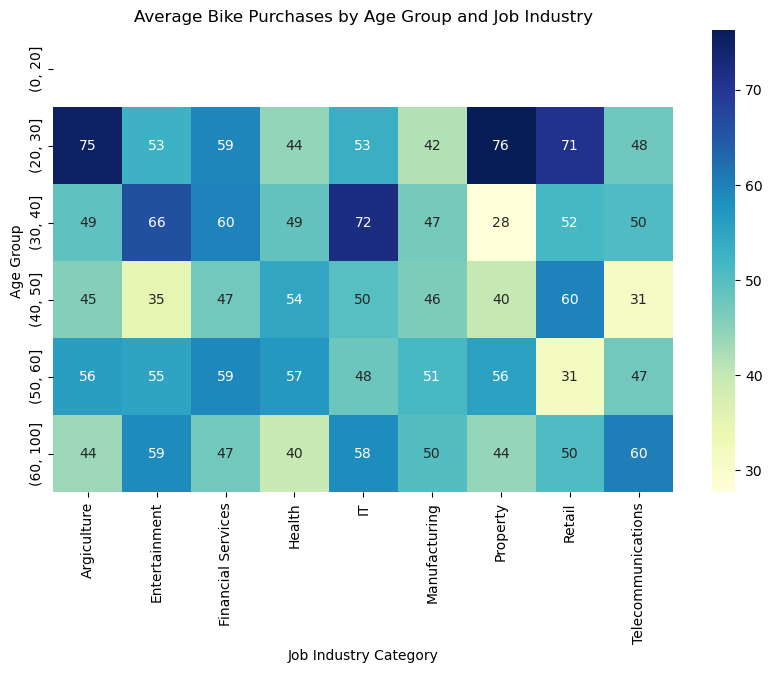

In [14]:
# Filtering the DataFrame to include only relevant columns
subset_df = df[['age_group', 'job_industry_category', 'past_3_years_bike_related_purchases']]

# Grouping the data by age group, job industry category, and calculate the mean of purchases
grouped_df = subset_df.groupby(['age_group', 'job_industry_category'])['past_3_years_bike_related_purchases'].mean().reset_index()

# Pivoting the DataFrame to have age groups as rows, job industry categories as columns, and mean purchases as values
pivot_df = grouped_df.pivot('age_group', 'job_industry_category', 'past_3_years_bike_related_purchases')

# Ploting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
plt.title('Average Bike Purchases by Age Group and Job Industry')
plt.xlabel('Job Industry Category')
plt.ylabel('Age Group')
plt.show()

# clustering customers

In [15]:
#choosing columns for clustering the data 
columns = ['age', 'past_3_years_bike_related_purchases']

X = df[columns].copy()

C:\Users\Amal_VT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


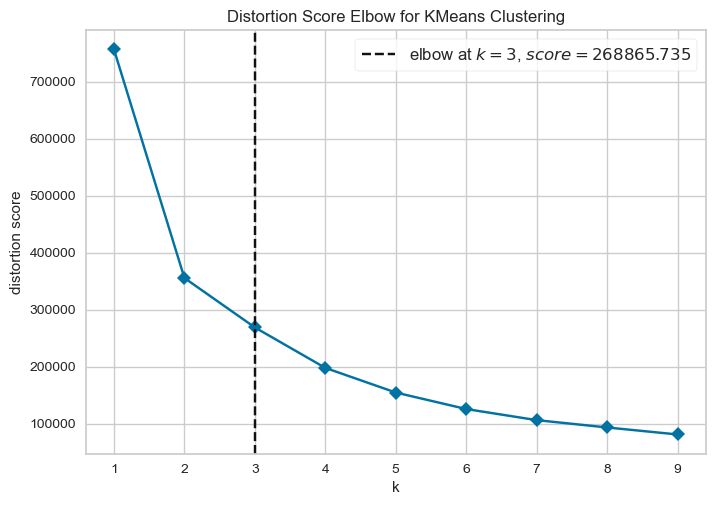

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
#finding the no of clusters 


# Fitting K-means models for different number of clusters
model=KMeans()
visualizer = KElbowVisualizer(model , k =(1,10), timings = False )
visualizer.fit(X)

# Plot the silhouette score
visualizer.show()

we are choosing 3 as the no of clusters 

Cluster Centers:
Cluster 1: [66.42574257 64.64356436]
Cluster 2: [50.86643836 21.73630137]
Cluster 3: [37.24886878 73.33484163]


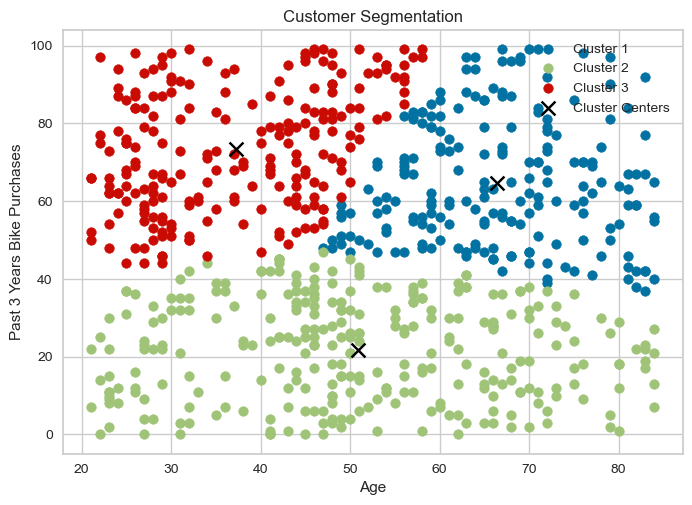

In [30]:

# Perform K-means clustering
k = 3# Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Print the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: {center}")

# Plot the clusters and cluster centers
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['age'], cluster_data['past_3_years_bike_related_purchases'], label=f"Cluster {i+1}")

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='black', marker='x', label='Cluster Centers')

plt.xlabel('Age')
plt.ylabel('Past 3 Years Bike Purchases')
plt.title('Customer Segmentation')
plt.legend()
plt.show()


from this its clear that

Cluster 1: Average age is around 66.42, average past_3_years_bike_related_purchases is around 64.64.

Cluster 2: Average age is around 50.86, average past_3_years_bike_related_purchases is around 21.73.

Cluster 3: Average age is around 37.24, average past_3_years_bike_related_purchases is around 73.33.

